<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb) | [Contents](Index.ipynb) | [Visualization with Seaborn](04.14-Visualization-With-Seaborn.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Basemap的地理資料

處理地理資料的視覺化工具是Basemap工具包，它是許多Matplotlib工具包其中之一，在
``mpl_toolkits``名稱空間中就可以使用。
安裝Basemap的程式很簡單，若使用conda的話，可以輸入以下程式就可安裝:

```
$ conda install basemap
```

然後加上一個新的匯入做標準的起始模板:

In [9]:
!pip3 install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 21.4 MB/s 
     |████████████████████████████████| 219 kB 42.4 MB/s 
     |████████████████████████████████| 6.3 MB 44.3 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=cf9f9888cadb2c8437435de72e23ba4d9e721599c35d4cbd42874bfd9d079b71
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

一旦下載且安裝了Basemap工具包，地理圖表繪製就只要少許的程式碼即可

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


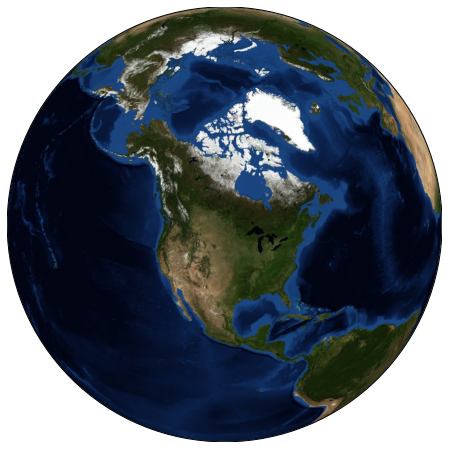

In [11]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100) # center of desired map domain 
m.bluemarble(scale=0.5); 
# display blue marble image (from http://visibleearth.nasa.gov) as map background.
# The scale keyword can be used to downsample the image (scale=0.5 downsamples to 2700x1350).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


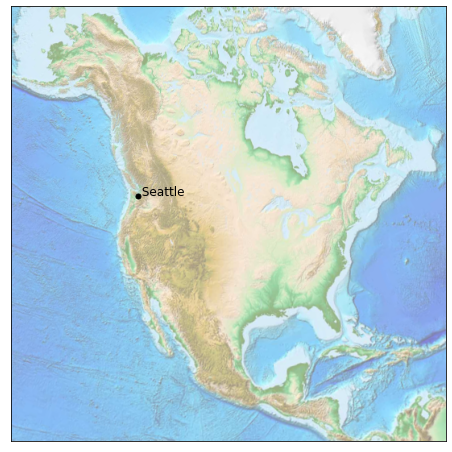

In [13]:
# 繪製出來的圖不僅是一張影像而已，是一個全功能
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
# width of desired map domain in projection coordinates (meters).
# height of desired map domain in projection coordinates (meters).
m.etopo(scale=0.5, alpha=0.5) # 使用etopo影像(展現地面上以及海底拓樸特徵)當作地圖的背景

# 對應(long, lat)到(x, y)以繪製上去
x, y = m(-122.3, 47.6) # 西經，北緯
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

上述的例子展現Python中只要使用短短幾行程式碼，即可進行某些種類地理資訊視覺化的能力。以下要深入討論Basemap的特色，並提供幾個視覺化地圖資料的例子。

## 地圖投影法

Basemap套件實作了成打的投影，全部都可以使用簡短的格式代碼參考得到。

In [14]:
from itertools import chain

def draw_map(m, scale=0.2):
    # 畫一個shaded-relief影像
    m.shadedrelief(scale=scale)
    
    # lats和longs被當作字典型態傳回
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys包含plt.Line2D的執行實例
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # 重複執行所有的線，並設定想要的樣式
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### 圓柱投影法

最簡單的投影法就是圓柱投影，此法的經緯度常數值分別被映射到水平和垂直的直線。

此投影方式在赤道地區表現良好，但接近極區時扭曲非常嚴重，緯度線的間隔在不同的圓柱投影時會改變，導致不同的保存特性以及接近極區時不同的扭曲。

以下顯示了*等距圓柱投影(equidistant cylindrical projection)*的例子，它選擇了一個緯度比例保留沿著經線的距離。其他圓柱投影法有麥卡托(Mercator)(``projection='merc'``)以及等積圓柱(``projection='cea'``)投影法。

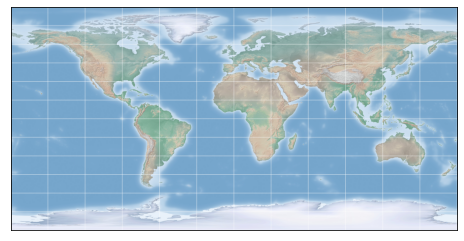

In [15]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
# llcrnrlon經: longitude of lower left hand corner of the desired map domain (degrees).
# llcrnrlat緯: latitude of lower left hand corner of the desired map domain (degrees).
# urcrnrlon經: longitude of upper right hand corner of the desired map domain (degrees).
# urcrnrlat緯: latitude of upper right hand corner of the desired map domain (degrees).
draw_map(m)

要顯示上圖的地圖，要使用額外的參數包含指定緯度(``lat``)、下半角落(``lon``)以及上半角落(``urcrnr``)的經度(``lon``)，單位都是度。

### 偽圓柱(Pseudo-cylindrical)投影法

放寬經線需要等長的要求只保留垂直的部分，這樣可以在極區有好的特性。
Mollweide投影(``projection='moll'``)是此種類型中常見的投影法，它所有經線都是橢圓形的弧線。此種方式建立出來的地圖可以保留在整個地圖中的相同面積，雖然在接近極區時會有扭曲，但對於面積的小修補反映出真實的面積。其他的偽圓柱投影還有正弦(``projection='sinu'``)和Robinson(``projection='robin'``)投影法。

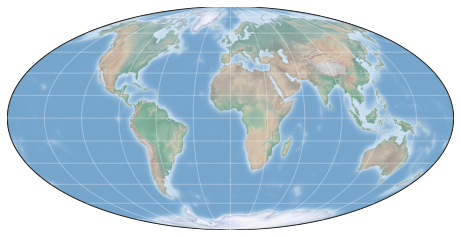

In [16]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

在此使用到的Basemap額外參數，是用來設定地圖的中間緯度(``lat_0``)和經度(``lon_0``).

### 透視投影法

藉由選定一個特定的透視角度建立的，類似於在太空中的某一個特定的點要為地球照張相片的情況。一個常見的例子是正交投影(orthographic projection)(``projection='ortho'``)，此方法展現出觀察者從非常遠的地方看地球的一個面。如此，它可以一次展現半個地球。其他以透視法為基礎的投影包括日晷(gnomonic)投影(``projection='gnom'``)和立體(stereographic projection)(``projection='stere'``)。這些都是經常被使用在展示小部分地圖的投影方法。


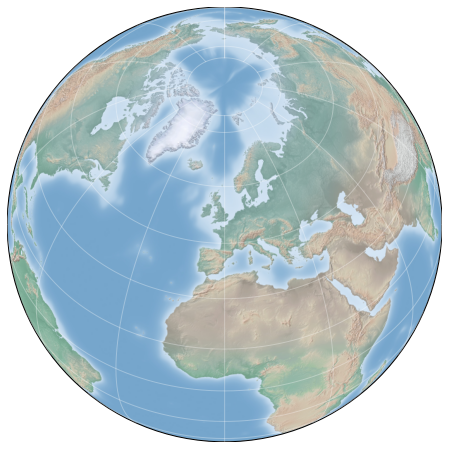

In [17]:
# 正交投影
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

### 圓錐(Conic)投影法

圓錐投影法把地圖映射到一個獨立的圓錐上，再將其展開。這樣會有非常好的區域特性，但是離圓錐焦距點較遠的區域會變得非常扭曲。

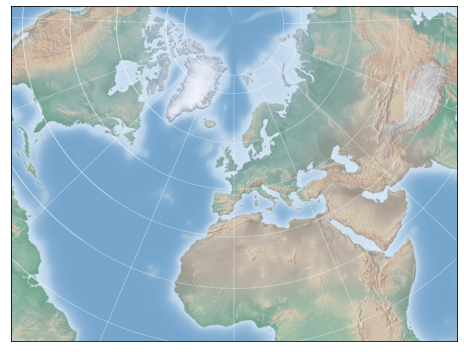

In [18]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55, # lat_1:first standard parallel for lambert conformal, albers equal area and equidistant conic.
            width=1.6E7, height=1.2E7)
draw_map(m)

## 在地圖上繪製資料

以下是其中的一些具有地圖特性的方法:
- ``contour()``/``contourf()`` : 繪製等高線或填滿的等高線
- ``imshow()``: 繪製影像
- ``pcolor()``/``pcolormesh()`` : 為不規則/規則的網格繪製一個虛擬色彩圖表
- ``plot()``: 繪製線條或/及記號
- ``scatter()``: 繪製記號點
- ``quiver()``: 繪製向量
- ``barbs()``: 繪製風矢
- ``drawgreatcircle()``: 繪製一個大圓

## 範例: 加州的城市

In [23]:
import pandas as pd
cities = pd.read_csv('/content/california_cities.csv')

# 擷取出感興趣的資料
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

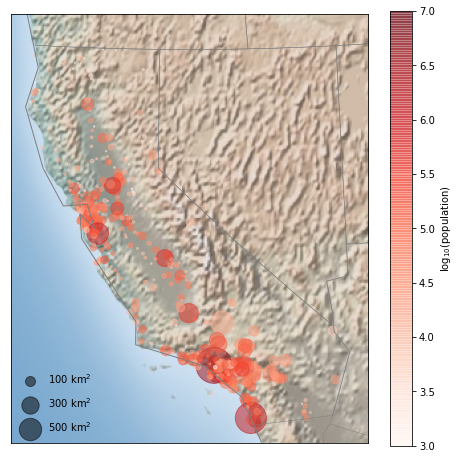

In [27]:
### 設定地圖投影，把這些資料畫上去，並建立色彩條和圖例 ### 
# 1. 繪製地圖的背景
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. 散佈城市資料，包括反映出人口數的色彩
# 以及反映出面積的尺寸
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. 建立色彩條和圖例
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# 建立沒有點的圖例
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

可以讓我們知道加州的人口集中在洛杉磯和舊金山的海邊，沿著平坦的中央山谷高速公路，且避開州界的山區。